Найти значения ожидаемых частот, зная наблюдаемые значения

In [2]:
from scipy.stats import chi2_contingency

In [2]:
obs = [[10, 6], [5, 15]]

In [4]:
chi2_contingency(obs)

(3.715714285714286,
 0.053902557169387154,
 1,
 array([[ 6.66666667,  9.33333333],
        [ 8.33333333, 11.66666667]]))

## Расчет ожидаемых значений

In [1]:
obs = [[15, 9], 
       [11, 6]]

In [9]:
chi2, p_value, dof, exp = chi2_contingency(obs, correction=True)

In [10]:
print("Хи-квадрат =", chi2)
print("p-value =", p_value)
print("Ожидаемые значения: ","\n", exp)

Хи-квадрат = 0.0
p-value = 1.0
Ожидаемые значения:  
 [[15.2195122  8.7804878]
 [10.7804878  6.2195122]]


### Задача 1

Перед знаком стоп некоторые водители останавливаются полностью, другие лишь сбавляют скорость, но некоторые не останавливаются вообще. Важнейший вопрос, есть ли взаимосвязь между полом и стилем вождения автомобиля!  Ниже представлена таблица сопряженности данных исследования, посвященного этому вопросу.

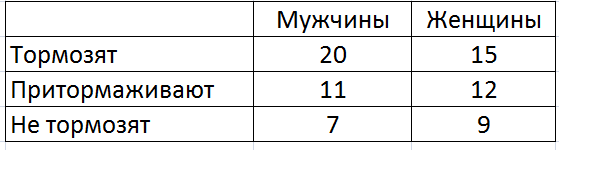

In [11]:
obs = [[20, 15],
       [11, 12],
       [7, 9]]

In [12]:
# С попроавкой Йетса
chi2, p_value, dof, exp = chi2_contingency(obs, correction=True)

In [14]:
print("Хи-квадрат =", chi2)
print("p-value =", p_value)
print("Число степеней свободы =", dof)
print("Ожидаемые значения: ","\n", exp)

Хи-квадрат = 0.9544070774762996
p-value = 0.6205162173513055
Число степеней свободы = 2
Ожидаемые значения:  
 [[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]


## Задача 2

Можно ли снизить риск тромбоза назначением небольших доз аспирина (160 мг/сут)?

In [16]:
import pandas as pd

In [40]:
t = {" ":["Плацебо", "Аспирин"], "Есть тромбоз":[18, 6], "Нет тромбоза":[7, 13]}
df = pd.DataFrame(t)

In [41]:
df.set_index(" ", inplace=True)
df

,Есть тромбоз,Нет тромбоза
,,
Плацебо,18,7
Аспирин,6,13


In [42]:
obs = []
obs.append([val for val in df.loc["Плацебо", :]])
obs.append([val for val in df.loc["Аспирин", :]])
print("Наблюдаемые значения:")
obs

Наблюдаемые значения:


[[18, 7], [6, 13]]

In [43]:
# Расчет Хи-квадрат с попроавкой Йетса
chi2, p_value, dof, exp = chi2_contingency(obs, correction=True)

In [44]:
print("Хи-квадрат =", chi2)
print("p-value =", p_value)
print("Число степеней свободы =", dof)
print("Ожидаемые значения: ","\n", exp)

Хи-квадрат = 5.57719298245614
p-value = 0.018195864430772903
Число степеней свободы = 1
Ожидаемые значения:  
 [[13.63636364 11.36363636]
 [10.36363636  8.63636364]]


**Интерпретретация остатков:**  
*Анализ остатков* (разница между ожидаемыми и эмпирическими значениями) позволяет выявить, какие именно частоты значимо отклоняются от ожидаемых значений.  
* Если значения стандартизированных остатков больше **3**, можно считать, что в этой ячейке зафиксированы значимые отклонения.

In [39]:
from statsmodels.graphics.mosaicplot import mosaic

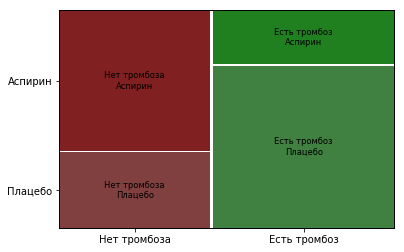

In [56]:
pill_data = {('Нет тромбоза', 'Плацебо'): 7,
             ('Нет тромбоза', 'Аспирин'): 13,
             ('Есть тромбоз', 'Плацебо'): 18, 
             ('Есть тромбоз', 'Аспирин'): 6
            }
# Значения 18, 7, 6, 13 являются входными значениями и соответсвуют таблице observed_array = [ [18, 7], [6, 13] ]

my_plot = mosaic(pill_data, gap=.009)

# Ширина прямоугольников соответствует количеству наблюдений
# Высота прямоугольников соответствует отклонению ожидаемых и наблюдаемых частот в этой ячейке

**Вывод:**
* Вероятность избежать тромбоза значимо выше в группе пациентов, употреблявших небольшие дозы аспирина: 68%, n_1 = 19, чем в контрольной группе пациентов: 28%, n_2 = 25, chi^2 = 5.58, df = 1, p = 0.018

## Код для mosaic графика стандартизированных остатков

In [57]:
# Импорт необходимых модулей
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
import numpy as np

In [58]:
def make_mosaic_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))

In [60]:
cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([7, 13, 18, 6], index=idx)
data

Placebo   Normal        7
          Trombosis    13
Aspirine  Normal       18
          Trombosis     6
dtype: int64

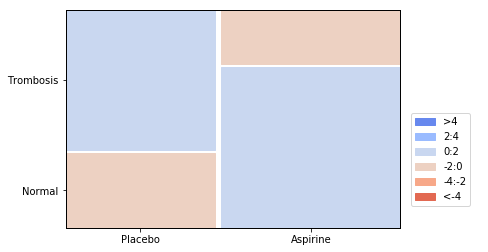

In [61]:
make_mosaic_plot(data)